# Lower-star Filtrations

A lower-star filtration on a simplicial complex $X$ is a filtration extended from a function on the vertex set $f: X_0\to \mathbb{R}$.  The lower-star filtration of $X$ at parameter $a$ is the maximal sub-complex of $X$ on the inverse image 
\begin{equation}
f^{-1}((-\infty, a]) \subseteq X_0
\end{equation}

The parameter at which a simplex $(x_0,\dots,x_k)\in X$ appears at is
\begin{equation}
f:(x_0,\dots,x_k) \mapsto \max \{f(x_i) \mid i = 0,\dots,k\}
\end{equation}

## Application to images

A common use of lower-star filtrations is to building filtrations on images using pixel values.

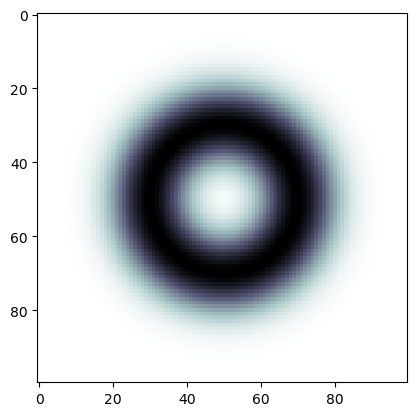

In [40]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
img = np.empty((n,n))

def rad(i,j, n):
    return np.sqrt((i - n/2)**2 + (j - n/2)**2)

for i in range(n):
    for j in range(n):
#         print(i,j, rad(i,j,n))
        img[i,j] = 1-np.exp(-(rad(i,j,n) - 20)**2/100)
        
plt.imshow(img, cmap='bone')
plt.show()

This image is a function on the square discretized into pixels.  We can build a simplicial complex which triangulates the square with vertices (0-simplices) identified with the pixels using the Freudenthal triangulation.

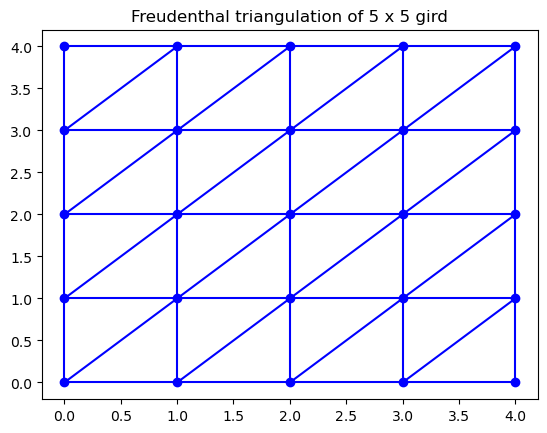

In [43]:
import bats

m = 5
X = bats.Freudenthal(m, m)
xx, yy = np.meshgrid(np.arange(m), np.arange(m))
xx = xx.flatten()
yy = yy.flatten()

fig, ax = plt.subplots()

# scatter vertices
ax.scatter(xx, yy, c='b')
# plot edges
for e in X.get_simplices(1):
    ax.plot(xx[e], yy[e], c='b')

ax.set_title("Freudenthal triangulation of {0} x {0} gird".format(m))
plt.show(fig)

To compute the lower-star filtration, we can use `bats.lower_star_filtration`, which returns the filtration value for each simplex as well as a map back to the largest value vertex in the simplex.

In [76]:
X = bats.Freudenthal(n, n)
vals, imax = bats.lower_star_filtration(X, img.flatten()) # computes filtration parameter to 
F = bats.Filtration(X, vals)

We can visualize the filtration on vertices:

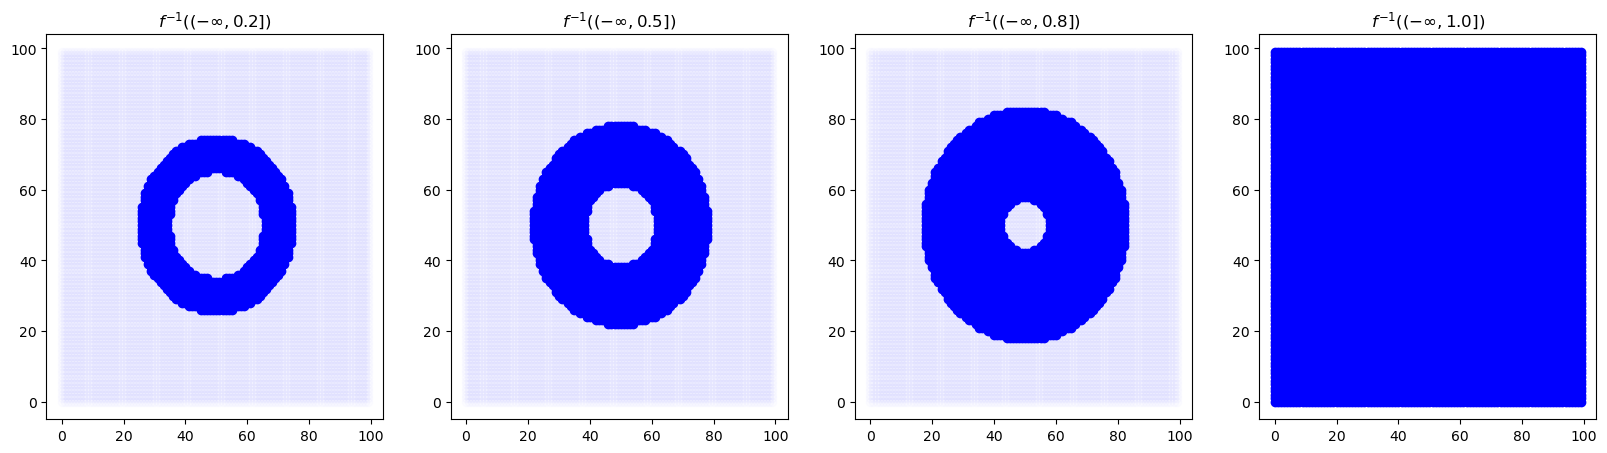

In [77]:
def show_sublevel(ax, F, alpha, xx, yy):
    """
    visualize the sublevelset (-inf, alpha]
    """
    Xa = F.sublevelset(alpha)
    ax.scatter(xx, yy, color=(0,0,1,0.01))
    
    # 0-simplices
    X0 = Xa.get_simplices(0)
    ax.scatter(xx[X0], yy[X0], color=(0,0,1,1))
    
    ax.set_title(r"$f^{{-1}}((-\infty, {}])$".format(alpha))

alphas = [0.2, 0.5, 0.8, 1.0]
fig, axs = plt.subplots(1, len(alphas), figsize = (5*len(alphas), 5))

xx, yy = np.meshgrid(np.arange(n), np.arange(n))
xx = xx.flatten()
yy = yy.flatten()

for ax, alpha in zip(axs, alphas):
    show_sublevel(ax, F, alpha, xx, yy)
    
plt.show(fig)

And compute persistent homology

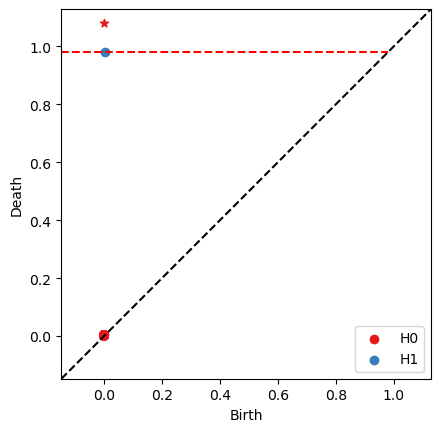

In [78]:
RF = bats.reduce(F, bats.F2())
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

We see a prominent $H_1$ pair corresponding to the annulus

In [80]:
for p in ps:
    if p.length() > 0.5:
        print(p)

0 : (0,inf) <3050,-1>
1 : (0.00378158,0.981684) <20537,10001>


## Cubical Complexes

Lower-star filtrations can be applied to cubical complexes as well (the inverse map is not computed)

In [81]:
X = bats.Cube(n,n)
vals = bats.lower_star_filtration(X, img)
F = bats.Filtration(X, vals)

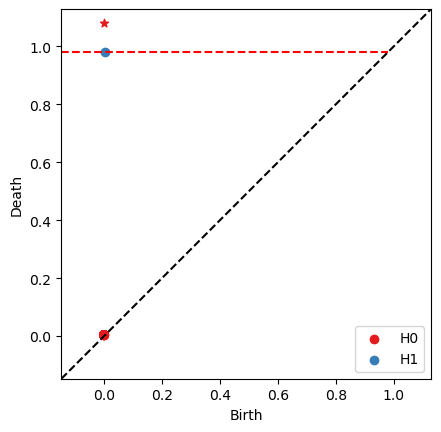

In [82]:
RF = bats.reduce(F, bats.F2())
ps = RF.persistence_pairs(0) + RF.persistence_pairs(1)
bats.persistence_diagram(ps)
plt.show()

In [83]:
for p in ps:
    if p.length() > 0.5:
        print(p)

0 : (0,inf) <3050,-1>
1 : (0.00378158,0.981684) <13747,5000>
